<a href="https://colab.research.google.com/github/krishnakaushik25/DataQuest-Guided-Projects/blob/main/Predicting_the_stock_market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting the stock market


![SNP500_2.png](attachment:SNP500_2.png)


## 1. Introduction



In this project, I'll work with data from the S&P500 Index. The S&P500 is a stock market index. More detailed information about S&P500 Index you can see <a href="https://www.spglobal.com/spdji/en/indices/equity/sp-500/#data" target="_blank">here</a> and <a href="https://www.thebalance.com/what-is-the-sandp-500-3305888" target="_blank">here</a>.  S&P 500 Companies List by Market Capitalization on  17 February 2021 you can see <a href="https://www.liberatedstocktrader.com/sp-500-companies/" target="_blank">here</a>.




Some companies are publicly traded, which means that anyone can buy and sell their shares on the open market. A share entitles the owner to some control over the direction of the company and to a percentage (or share) of the earnings of the company. When you buy or sell shares, it's common known as trading a stock.

The price of a share is based on supply and demand for a given stock. Stocks are traded daily and the price can rise or fall from the beginning of a trading day to the end based on demand. Stocks that are in more in demand, such as Apple, are traded more often than stocks of smaller companies.

Indexes aggregate the prices of multiple stocks together, and allow you to see how the market as a whole performs.
The S&P500 Index aggregates the stock prices of 500 large companies. When an index fund goes up or down, you can say that the primary market or sector it represents is doing the same. For example, if the Dow Jones Industrial Average price goes down one day, you can say that American stocks overall went down (ie, most American stocks went down in price).

You'll be using historical data on the price of the S&P500 Index to make predictions about future prices. Predicting whether an index goes up or down helps forecast how the stock market as a whole performs. Since stocks tend to correlate with how well the economy as a whole is performs, it can also help with economic forecasts.


## 2. The Dataset

In this project I using data manually copied from browser window  to file with csv format from <a href="https://finance.yahoo.com/quote/%5EGSPC/history?period1=-1293840000&period2=1627689600&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true" target="_blank">this query</a> to Yahoo Finance for period from 01 January 1929 to 31 July 2021 year. I tried download this data with `request` - but it didn't work correctly in my case.


## 3. Reading and cleaning  the Data

Load required modules, open and clean dataset.

In [ ]:
from IPython.display import HTML
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

from IPython.display import display
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')  
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')

# open and parse Date to datetime
snp500_raw = pd.read_csv("data/SNP_500_1929_2021.csv", parse_dates = ["Date"])

# Examine dataset
snp500_raw.info()

/home/mvg/ds387/lib/python3.8/site-packages/patsy/constraint.py:13: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.9 it will stop working
  from collections import Mapping


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23256 entries, 0 to 23255
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         23256 non-null  datetime64[ns]
 1   Open         23256 non-null  float64       
 2   High         23256 non-null  float64       
 3   Low          23256 non-null  float64       
 4   Close*       23256 non-null  float64       
 5   Adj Close**  23256 non-null  float64       
 6   Volume       23256 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 1.2+ MB


In [ ]:
# Check range values in the colummn Volume
snp500_raw.Volume.unique()

array(['2861600000', '2815510000', '3215130000', ..., '780000', '680000',
       '-'], dtype=object)

In [ ]:
# Assign new dataframe  rows without `-` values  
snp500 = snp500_raw[snp500_raw.Volume != '-']

# Convert string to integer  volumes in Volumne column
snp500.Volume = snp500.Volume.astype(int)

# Rename columns
snp500.columns = ['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume']

snp500.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18011 entries, 0 to 18010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       18011 non-null  datetime64[ns]
 1   open       18011 non-null  float64       
 2   high       18011 non-null  float64       
 3   low        18011 non-null  float64       
 4   close      18011 non-null  float64       
 5   adj_close  18011 non-null  float64       
 6   volume     18011 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 1.1 MB


dataset cleaned and all columns have numeric values without NaN or categorical data from 03 January 1950 to 30 July 2021 year.

Before going to next parts plotting S&P500 Index `close` and `volume` from historical data from 1929 and 1950 year to nowadays.

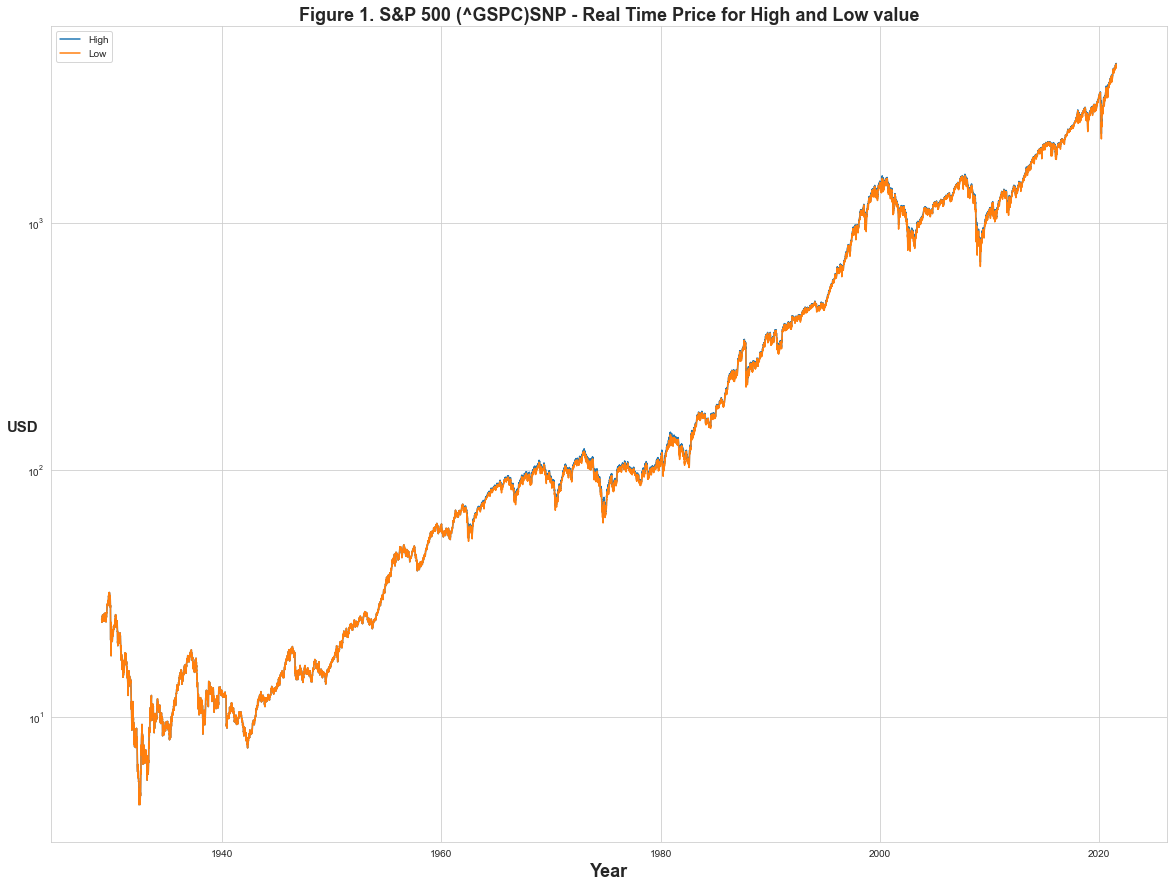

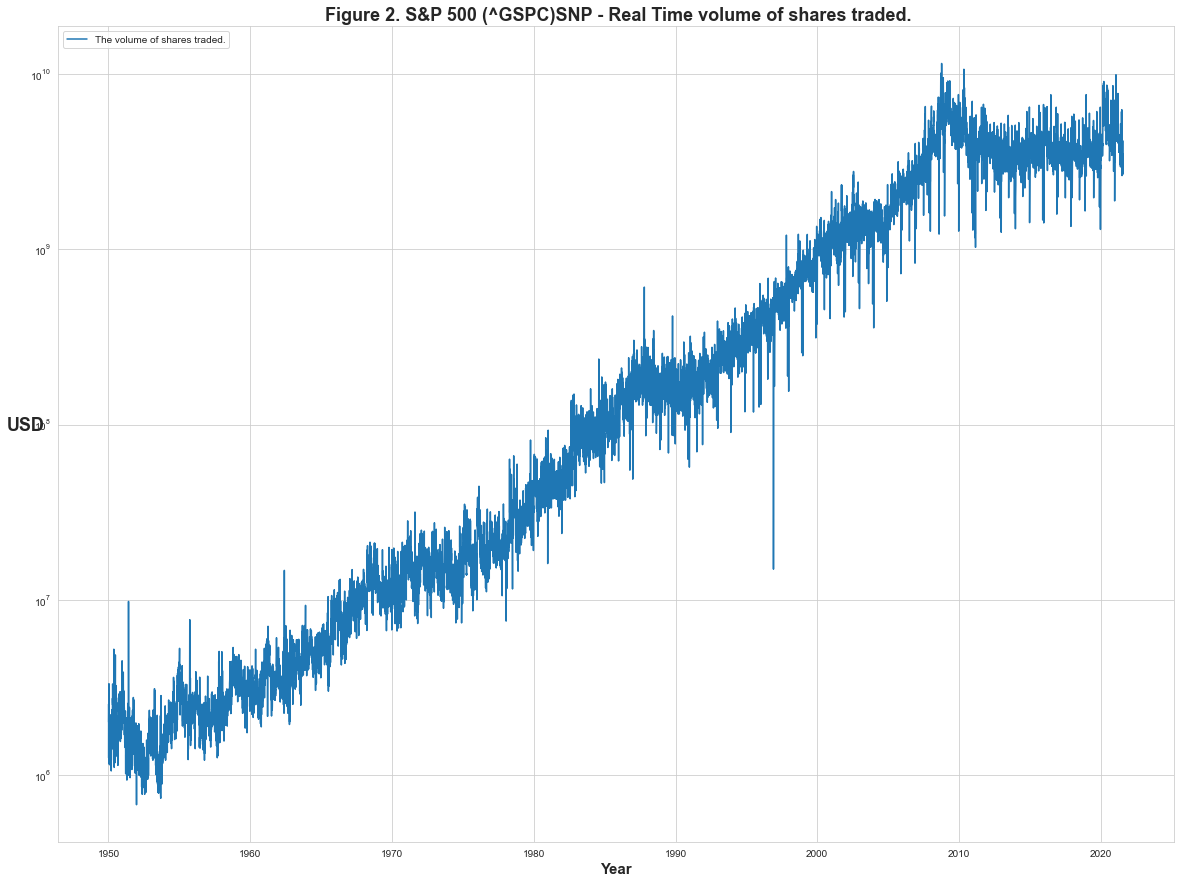

In [ ]:
# Plotting `close` and `volume` in log scale

# Plot SNP500 high and low value from 1929 to 2021 year
fig, ax = plt.subplots(figsize=(20, 15))
sns.set_style('whitegrid')
ax = sns.lineplot(data=snp500_raw,  x="Date", y="High", ax=ax, legend = "full")
ax = sns.lineplot(data=snp500_raw,  x="Date", y="Low", ax=ax, legend = "full")
ax.set_yscale("log")
ax.legend(loc="upper left", labels=['High', 'Low'])
ax.set_ylabel('USD', fontsize = 15, weight = "bold", rotation = 0)
ax.set_xlabel ('Year', fontsize = 18, weight = "bold")
ax.set_title('Figure 1. S&P 500 (^GSPC)SNP - Real Time Price for High and Low value',
             fontsize = 18, weight = "bold")
plt.show()

# Plot SNP500  from 1950 to 2021 year
fig, ax = plt.subplots(figsize=(20, 15))
sns.set_style('whitegrid')
ax = sns.lineplot(data=snp500,  x="date", y="volume", ax=ax)
ax.set_yscale("log")
ax.legend(loc="upper left", labels=['The volume of shares traded.'])
ax.set_ylabel('USD', fontsize = 18, weight = "bold", rotation = 0)
ax.set_xlabel ('Year', fontsize = 15, weight = "bold")
ax.set_title(' Figure 2. S&P 500 (^GSPC)SNP - Real Time volume of shares traded.',
             fontsize = 18, weight = "bold")
plt.show()

As seen above plots very goods describe real economical situation in the USA in the periods 1929 - 2021 and 1950 - 2021. As seen great Great Depression 1929 - 1933, 1973 oil crisis, The crush dot-com bubble 2000, The 2008 Crash,  March 2020 that was worse than the financial crisis ant etc.


## 4. Generating Indicators 

Here are some indicators that are interesting to generate for rows `close` and `volume`:

* The mean of values from the past 5   days.

* The standard deviation of the values over the past 5 days.

* The mean of values for the past 30 days.

* The standard deviation of the values over the past 30 days.

* The mean of values for the past 365 days.

* The standard deviation of the values over the past 365 days.

* The ratio between the mean of values for the past 5 trade, and the mean price for the past 30 days.

* The ratio between the standard deviation of values for the past 5 trade, and the standard deviation price for the past 30 days.

* The ratio between the mean values for the past 5 trade, and the mean price for the past 365 days.

* The ratio between the standard deviation values for the past 5 trade, and the standard deviation price for the past 365 days.

Note: term "days" above  means "trading" or working days  .

Generate indicator columns and I want add datetime as predictor  to train datasets and convert it to integer,  see code bellow:

In [ ]:
# make copy
snp500_ind = snp500.copy() 

# Create mean and std for 5, 30,  and 365 day window  for columns `close` and 
# `volumme` as close_mean_5d and volume_mean_5d and etc,  using shift after 
# each rolling
# window for close column

# for close column 5d
snp500_ind['close_mean_5d'] = snp500_ind.rolling(5).mean().close
snp500_ind.close_mean_5d = snp500_ind.close_mean_5d.shift() 
snp500_ind["close_std_5d"] = snp500_ind.rolling(5).std().close
snp500_ind.close_std_5d = snp500_ind.close_std_5d.shift() 

# for close column 30d
snp500_ind['close_mean_30d'] = snp500_ind.rolling(30).mean().close
snp500_ind.close_mean_30d = snp500_ind.close_mean_30d.shift() 
snp500_ind["close_std_30d"] = snp500_ind.rolling(30).std().close
snp500_ind.close_std_30d = snp500_ind.close_std_30d.shift() 

# for close column 365d
snp500_ind['close_mean_365d'] = snp500_ind.rolling(365).mean().close
snp500_ind.close_mean_365d = snp500_ind.close_mean_365d.shift() 
snp500_ind["close_std_365d"] = snp500_ind.rolling(365).std().close
snp500_ind.close_std_365d = snp500_ind.close_std_365d.shift() 

# Ratios mean and std 5  day to 30 and 365 day mean and std
snp500_ind['close_mean_5d_to_30d'] = snp500_ind.close_mean_5d \
                                    /snp500_ind.close_mean_30d
snp500_ind["close_std_5d_to_30d"] = snp500_ind.close_std_5d \
                                /snp500_ind.close_std_30d
snp500_ind['close_mean_5d_to_365d'] = snp500_ind.close_mean_5d \
                            /snp500_ind.close_mean_365d
snp500_ind["close_std_5d_to_365d"] = snp500_ind.close_std_5d \
                            /snp500_ind.close_std_365d
    

# Window and ratios for volume column
# for volume column 5d
snp500_ind['volume_mean_5d'] = snp500_ind.rolling(5).mean().volume
snp500_ind.volume_mean_5d = snp500_ind.volume_mean_5d.shift() 
snp500_ind["volume_std_5d"] = snp500_ind.rolling(5).std().volume
snp500_ind.volume_std_5d = snp500_ind.volume_std_5d.shift() 

# for volume column 30d
snp500_ind['volume_mean_30d'] = snp500_ind.rolling(30).mean().volume
snp500_ind.volume_mean_30d = snp500_ind.volume_mean_30d.shift() 
snp500_ind["volume_std_30d"] = snp500_ind.rolling(30).std().volume
snp500_ind.volume_std_30d = snp500_ind.volume_std_30d.shift() 

# for volume column 365d
snp500_ind['volume_mean_365d'] = snp500_ind.rolling(365).mean().volume
snp500_ind.volume_mean_365d = snp500_ind.volume_mean_365d.shift() 
snp500_ind["volume_std_365d"] = snp500_ind.rolling(365).std().volume
snp500_ind.volume_std_365d = snp500_ind.volume_std_365d.shift() 

# Ratios mean and std 5  day to 30 and 365 day mean and std
snp500_ind['volume_mean_5d_to_30d'] = snp500_ind.volume_mean_5d \
                                    /snp500_ind.volume_mean_30d
snp500_ind["volume_std_5d_to_30d"] = snp500_ind.volume_std_5d \
                                /snp500_ind.volume_std_30d
snp500_ind['volume_mean_5d_to_365d'] = snp500_ind.volume_mean_5d \
                            /snp500_ind.volume_mean_365d
snp500_ind["volume_std_5d_to_365d"] = snp500_ind.volume_std_5d \
                                      /snp500_ind.volume_std_365d 
display(snp500_ind.head())

,date,open,high,low,close,adj_close,volume,close_mean_5d,close_std_5d,close_mean_30d,close_std_30d,close_mean_365d,close_std_365d,close_mean_5d_to_30d,close_std_5d_to_30d,close_mean_5d_to_365d,close_std_5d_to_365d,volume_mean_5d,volume_std_5d,volume_mean_30d,volume_std_30d,volume_mean_365d,volume_std_365d,volume_mean_5d_to_30d,volume_std_5d_to_30d,volume_mean_5d_to_365d,volume_std_5d_to_365d
0,2021-07-30,4395.12,4412.25,4389.65,4395.26,4395.26,2861600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-07-29,4403.59,4429.97,4403.59,4419.15,4419.15,2815510000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-07-28,4402.95,4415.47,4387.01,4400.64,4400.64,3215130000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-07-27,4416.38,4416.38,4372.51,4401.46,4401.46,3381080000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-07-26,4409.58,4422.73,4405.45,4422.30,4422.30,2679110000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 5. Dividing dataset to dataset with `close` and `volume` values 

In [ ]:
# Drop columns exlcude close  and volume and  theirs deriatives and add 
# two numeric type of date
# _n_1 = convert timedelta from start day-1 to integer 
start_date = pd.Timestamp('1949-12-31')
snp500_c_v = snp500_ind.copy()
#  Divide to close _c and volume _v dataframe
c_cols = ['date', 'close', 'close_mean_5d', 'close_std_5d', 'close_mean_30d', 
          'close_std_30d','close_mean_365d', 'close_std_365d', 
          'close_mean_5d_to_30d', 'close_std_5d_to_30d', 
          'close_mean_5d_to_365d', 'close_std_5d_to_365d']
snp500_c = snp500_c_v[c_cols].copy()
snp500_c["date_int"] = (snp500_c.date - start_date).dt.days

v_cols = ['date','volume','volume_mean_5d', 'volume_std_5d', 'volume_mean_30d', 
		'volume_std_30d', 'volume_mean_365d', 'volume_std_365d', 
        'volume_mean_5d_to_30d', 'volume_std_5d_to_30d', 
        'volume_mean_5d_to_365d', 'volume_std_5d_to_365d']
snp500_v = snp500_c_v[v_cols].copy()
del snp500_c_v
snp500_v["date_int"] = (snp500_v.date - start_date).dt.days

# Reorder columns as date_int, mean_x-> mean_x_std->, etc -> close or voluime
# Defive new order
c_new_col_order = ['date', 'date_int',  'close_mean_5d', 'close_std_5d', 
                   'close_mean_30d', 'close_std_30d', 'close_mean_365d', 
                   'close_std_365d', 'close_mean_5d_to_30d', 
                   'close_std_5d_to_30d', 'close_mean_5d_to_365d',
                   'close_std_5d_to_365d', 'close']

v_new_col_order = ['date', 'date_int','volume_mean_5d', 
                   'volume_std_5d', 'volume_mean_30d', 'volume_std_30d', 
                   'volume_mean_365d', 'volume_std_365d',
                   'volume_mean_5d_to_30d', 'volume_std_5d_to_30d',
                   'volume_mean_5d_to_365d', 'volume_std_5d_to_365d', 'volume']

# Reored columns
snp500_c = snp500_c.reindex(columns = c_new_col_order) 
snp500_v = snp500_v.reindex(columns = v_new_col_order)

# Separate by date - X, Y less equal "2018-12-31", 
# x, y - greater than 2018-12-31 and less equal than "2021-07-23"
border_date = pd.Timestamp("2018-12-31")
high_border_date = pd.Timestamp("2021-07-23")

snp500_c_X = snp500_c[snp500_c.date <= border_date].iloc[:,1:-1]
snp500_c_Y = snp500_c[snp500_c.date <= border_date].iloc[:,[0,-1]]
snp500_c_x = snp500_c[(snp500_c["date"] > border_date) & 
                      (snp500_c["date"] <= high_border_date)].iloc[:,1:4]
snp500_c_y = snp500_c[(snp500_c["date"] > border_date) & 
                      (snp500_c["date"] <= high_border_date)].iloc[:,[0,-1]]

snp500_v_X = snp500_v[snp500_v.date <= border_date].iloc[:,1:-1]
snp500_v_Y = snp500_v[snp500_v.date <= border_date].iloc[:,[0,-1]]
snp500_v_x = snp500_v[(snp500_v["date"] > border_date) & 
                      (snp500_v["date"] <= high_border_date)].iloc[:,1:4]
snp500_v_y = snp500_v[(snp500_v["date"] > border_date) & 
                      (snp500_v["date"] <= high_border_date)].iloc[:,[0,-1]]
display(snp500_c_X.head())
display(snp500_c_y.head())
display(snp500_v_X.head())
display(snp500_v_y.head())

,date_int,close_mean_5d,close_std_5d,close_mean_30d,close_std_30d,close_mean_365d,close_std_365d,close_mean_5d_to_30d,close_std_5d_to_30d,close_mean_5d_to_365d,close_std_5d_to_365d
650,25202,2522.792,48.074901,2642.579667,75.176892,2934.964849,206.992581,0.954670,0.639490,0.859565,0.232254
651,25199,2509.280,38.476107,2634.373667,76.134749,2933.500575,208.125520,0.952515,0.505369,0.855388,0.184870
652,25198,2496.490,31.720995,2625.740667,77.853994,2932.085890,209.408912,0.950776,0.407442,0.851438,0.151479
653,25197,2487.868,24.774810,2618.375000,80.048920,2930.164493,210.250361,0.950157,0.309496,0.849054,0.117835
654,25195,2491.830,17.213261,2610.369000,82.753474,2928.138521,211.134661,0.954589,0.208007,0.850995,0.081527


,date,close
5,2021-07-23,4411.79
6,2021-07-22,4367.48
7,2021-07-21,4358.69
8,2021-07-20,4323.06
9,2021-07-19,4258.49


,date_int,volume_mean_5d,volume_std_5d,volume_mean_30d,volume_std_30d,volume_mean_365d,volume_std_365d,volume_mean_5d_to_30d,volume_std_5d_to_30d,volume_mean_5d_to_365d,volume_std_5d_to_365d
650,25202,3.991434e+09,2.034805e+08,3.771206e+09,3.253217e+08,4.138599e+09,1.337384e+09,1.058397,0.625475,0.964441,0.152148
651,25199,3.863402e+09,3.066712e+08,3.763610e+09,3.303696e+08,4.132052e+09,1.334917e+09,1.026515,0.928267,0.934984,0.229731
652,25198,3.782984e+09,2.790497e+08,3.759438e+09,3.303217e+08,4.122967e+09,1.326473e+09,1.006263,0.844782,0.917539,0.210370
653,25197,3.759624e+09,2.355001e+08,3.783926e+09,3.270545e+08,4.116188e+09,1.320237e+09,0.993578,0.720064,0.913375,0.178377
654,25195,3.841850e+09,3.197890e+08,3.804315e+09,3.355874e+08,4.110301e+09,1.314883e+09,1.009867,0.952923,0.934688,0.243207


,date,volume
5,2021-07-23,3490730000
6,2021-07-22,2907910000
7,2021-07-21,3078550000
8,2021-07-20,3634190000
9,2021-07-19,4155790000


## 6. Check collinearity train datasets with VIF

The variance inflation factor <a href="https://www.statsmodels.org/stable/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html" target="_blank">(VIF)</a> measures the correlation and strength of correlation between the explanatory variables in a regression model. Check collinearity for values in the all columns on train datasets. 

In [ ]:
# Check collinearity for X dataset and find optiomal scaler
def collinearity(dataframe, features):
    """
    Define variance inflation factor (VIF) for features of predictor with 
    using  different scalers.   Input arguments – dataframe and list of 
    tested features. Return dataframe with VIF values for each futures in 
    the  different scales.
    "As a rule of thumb, a VIF value that exceeds 5 or 10 indicates a 
    problematic amount of  collinearity”.  
    p.110 An Introduction to Statistical Learning with Applications in R 
    © Springer Science+Business Media New York 2013 
    DOI 10.1007/978-1-4614-7138-7

    Parameters
    ----------
    dataframe : pandas datafrmae
        dataframe X with tested features columns.
    viflist : list of column names of dataframe
        Features for VIF calculation.

    Returns
    -------
    vif_df : dataframe
        VIF values for feature columns in the different scales.
    """
    test_df = dataframe.copy()
    test_df = test_df[~test_df.isnull().any(axis =1)]
    test_feat = features[:]
    test_df = test_df[test_feat]
    
    # create empty dataframe
    vif_df = pd.DataFrame()
    vif_df["feature"] = test_feat
    
    # find vif for non sclaed data
    vif_df["no_scale"] = [variance_inflation_factor(test_df.values, i)
                          for i in range(len(test_feat))]
    
    # find vif for minmax scaler
    min_max = MinMaxScaler()
    test_df_min_max = min_max.fit_transform(test_df.copy())
    vif_df["min_max_scale"] = [variance_inflation_factor(test_df_min_max, i)
                          for i in range(len(test_feat))]
    
    # find vir for robust scaler
    robust = RobustScaler()
    test_df_robust = robust.fit_transform(test_df.copy())
    vif_df["robust_scale"] = [variance_inflation_factor(test_df_robust, i)
                          for i in range(len(test_feat))]
    
    # find vif for standard scaler
    standard = StandardScaler()
    test_df_standard = standard.fit_transform(test_df.copy())
    vif_df["standard_scale"] = [variance_inflation_factor(test_df_standard, i)
                          for i in range(len(test_feat))]
    
    return vif_df


# Extract columns name
c_all_col = list(snp500_c_X.columns)
v_all_col = list(snp500_v_X.columns)

# Check coollinearity
c_all_col_coll = collinearity(snp500_c_X, c_all_col)
v_all_col_coll = collinearity(snp500_v_X, v_all_col)
print("\nSNP 500 close all features collinearity")
display(c_all_col_coll)
print("\nSNP 500 volume all features collinearity")
display(v_all_col_coll)


SNP 500 close all features collinearity


,feature,no_scale,min_max_scale,robust_scale,standard_scale
0,date_int,17.493008,16.635072,2.312152,4.361449
1,close_mean_5d,2311.582513,2668.758628,3167.708996,2375.748949
2,close_std_5d,6.605041,6.415712,5.601513,4.675469
3,close_mean_30d,2720.300607,3401.109290,3601.099982,2690.569208
4,close_std_30d,8.478045,8.349281,6.918913,5.589203
5,close_mean_365d,304.280801,291.981920,239.872409,179.543399
6,close_std_365d,10.559378,10.404482,7.794427,6.312505
7,close_mean_5d_to_30d,221.463952,23.902398,2.196190,2.200980
8,close_std_5d_to_30d,8.702969,7.836548,2.358450,2.268188
9,close_mean_5d_to_365d,217.665146,21.069654,2.599594,2.554484



SNP 500 volume all features collinearity


,feature,no_scale,min_max_scale,robust_scale,standard_scale
0,date_int,11.351083,10.310860,1.996538,3.057072
1,volume_mean_5d,67.856375,71.843728,81.844483,63.434662
2,volume_std_5d,6.215929,6.280302,5.979148,5.109190
3,volume_mean_30d,131.813065,136.188835,139.665476,107.833288
4,volume_std_30d,13.244512,13.194772,12.598631,10.245009
5,volume_mean_365d,121.835650,121.435123,103.577788,87.345810
6,volume_std_365d,34.223206,34.100433,30.286994,25.510410
7,volume_mean_5d_to_30d,71.983950,32.946808,2.325488,2.324618
8,volume_std_5d_to_30d,14.287263,13.022123,2.885786,2.820573
9,volume_mean_5d_to_365d,59.554911,24.160863,2.626326,2.630196


As seen above, some features have the strong correlations high than 5.0, because its is derivatives from values `close` and `volume`.  In addition, window function generate  large number of NaN values for the periods  month and year. Of course, you can use the knn method to predict their values, but this makes no sense against the background of the collinearity of these parameters.
Delete all columns containing collinear data and NaN values and leave only the following columns and check for collinearity again.

In [ ]:
# Remove all NaN values and columns not existed in x and define final train 
# dataset 
snp500_c_X = snp500_c_X.iloc[:,:3] 
snp500_v_X = snp500_v_X.iloc[:,:3]


# Recheck collinearity againg
c_col = list(snp500_c_X.columns)
snp500_c_coll = collinearity(snp500_c_X, c_col)
v_col = list(snp500_v_X.columns)
snp500_v_coll = collinearity(snp500_v_X, v_col)
print("\nSNP 500 close remain features collinearity")
display(snp500_c_coll)
print("\nSNP 500 volume remain features collinearity")
display(snp500_v_coll)


SNP 500 close remain features collinearity


,feature,no_scale,min_max_scale,robust_scale,standard_scale
0,date_int,4.767611,4.566243,2.220315,3.970154
1,close_mean_5d,5.949462,5.689155,3.463051,4.503079
2,close_std_5d,2.836743,2.834554,2.410321,2.014389



SNP 500 volume remain features collinearity


,feature,no_scale,min_max_scale,robust_scale,standard_scale
0,date_int,2.466884,2.465039,1.797463,2.349869
1,volume_mean_5d,5.323365,5.319300,4.470563,4.523818
2,volume_std_5d,3.695818,3.695572,3.564687,3.007921


As seen above,  remaining features have reasonable values of collinearity, less than 5. 

I will predict values using <a href="https://scikit-learn.org/stable/modules/linear_model.html#lasso" target="_blank">Lasso</a> regression.

The best scaler in this case - <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler" target="_blank">StandardScaler</a>.

## 7. Finding optimal hyper parameters for Lasso regression

I don't use  LassoCV because it outputs  only  R2 values which is not a reliable indicator unlike MAE or RMSE for linear regression.

In [ ]:
# concatenate X and x, Y and y to cross validation datasets for close and volume
# concatenate snp500_c
c_x_frames = [snp500_c_x, snp500_c_X]
snp500_c_x_X = pd.concat(c_x_frames)
c_y_frames = [snp500_c_y.iloc[:,[-1]], snp500_c_Y.iloc[:,[-1]]]
snp500_c_y_Y = pd.concat(c_y_frames)
snp500_c_cv = pd.merge(snp500_c_x_X, snp500_c_y_Y,  left_index=True, 
                                                   right_index=True)
# concatenate snp500_v
v_x_frames = [snp500_v_x, snp500_v_X]
snp500_v_x_X = pd.concat(v_x_frames)
v_y_frames = [snp500_v_y.iloc[:,[-1]], snp500_v_Y.iloc[:,[-1]]]
snp500_v_y_Y = pd.concat(v_y_frames)
snp500_v_cv = pd.merge(snp500_v_x_X, snp500_v_y_Y,  left_index=True, 
                                                    right_index=True)


def alpha_Lasso_CV(dataframe_X_y, start = -5, end = 1, divider = 600):
    """
    Definng optimal alphas for lasso regressions using StandardScaler
    by ‘neg_mean_absolute_error’ metric value
    in range 10 ** start - 10 ** end with iterations = divide
    Features grouped in the next order - [feature_1], 
    [feature_1, feature_2] and etc.
    kFolds = 10, n_repeats = 3
    Parameters
    ----------
    dataframe_X_y : pondas datafreme 
        DESCRIPTION.
        tested dataframe with complete X, Y and x, y data
    start : TYPE, integer
        DESCRIPTION. The default is -5.
    end : TYPE, integer
        DESCRIPTION. The default is 1.
    iterations : TYPE, optional
        DESCRIPTION. The default is 600.

    Returns
    -------
    cv_df : pandas dataframe
        Optimal alprahs for number of features.

    """
    test_df = dataframe_X_y.copy() 
    # Scale dataset
    std_scaler = StandardScaler()
    test_df.iloc[:, :] = std_scaler.fit_transform(test_df.iloc[:, :])
    # Divide X and y
    X, y = test_df.iloc[:, :-1], test_df.iloc[:, [-1]] 
    features = list(X)
    # Create list of list features
    cv_features = []
    no_features = []
    for i, feature in enumerate(features[:]):
        if i <= len(features) - 1:
            cv_features.append(list(features[0:i+1]))
            no_features.append(i+1)
        else:
            cv_features.append(features[:])
            no_features.append(i+1)
            break
    # Defive CV
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # List for values alpha and mae
    lasso_alphas = []
    lasso_mae =[]
    
    for cv_feature in cv_features:
        # create model
        model = Lasso()
        #define interval
        grid = dict()
        grid['alpha'] = np.logspace(start, end, num = divider )
        # find alpha
        search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1) 
        # fit model
        alpha = search.fit(X[cv_feature],y)
        # append alpha that produced the lowest test RMSE
        lasso_alphas.append(alpha.best_params_["alpha"])
        lasso_mae.append(-alpha.best_score_)
    
    cv_df = pd.DataFrame()
    cv_df["futures"] = no_features
    cv_df["mae"] = lasso_mae
    cv_df["alpha"] = lasso_alphas
    return cv_df


snp500_c_alphas =  alpha_Lasso_CV(snp500_c_cv)
snp500_v_alphas = alpha_Lasso_CV(snp500_v_cv)
print("\nSNP500 close alphas")
display(snp500_c_alphas)
print("\nSNP500 volume alphas")
display(snp500_v_alphas)


SNP500 close alphas


,futures,mae,alpha
0,1,0.392143,0.172608
1,2,0.008607,0.000516
2,3,0.008438,0.000283



SNP500 volume alphas


,futures,mae,alpha
0,1,0.485894,0.143525
1,2,0.079844,0.005951
2,3,0.079847,0.005951


## 8. Training and checking model.

Train model using consequentially one, two and three features - encoded date(1 features), encoded date plus 5 day window mean for close or volume (2 features) and encoded date plus 5 day window mean for close or volume  plus 5 day window mean std for close or volume (3 features) using linear (OLS) and Lasso regression. 

Collect and print metrics for models.

In [ ]:
def lasso_predict(X, Y, x, y, parameters = None):
    """
    Train model and calculate predicted values and metrics for train and test
    datasets. 
    Parameters
    ----------
    X : pandas dataframe
        Train dataset features.
    Y : pandas dataframe
        Train dataset values.
    x : pandas dataframe
        Test dataset features
    y : pandas dataframe
        predicted of standard linear or Lasso regression values.
    parameters : alpha values for each sets of features
        list of numbers for Lasso ragression. Default None for standard linear
        regression

    Returns
    -------
    predicted_y : pandas dataframe
        Contains fact values (second column) and predicted values(columns after
        second columns) .
    model_metrics : pandas dataframe
        Different metrics of model for predicted values for tested and train
        datasets.
    """
    
    train_X = X.copy()
    train_Y = Y.copy()
    test_x = x.copy()
    test_y = y.copy()
    # separate Y and y values from date
    Y = train_Y.iloc[:, [-1]].copy()
    y = test_y.iloc[:, [-1]].copy()
        
    # create list of features [[feature_1], [feature_1, feature_2], and etc. ]
    columns_name = train_X.columns
    features = [list(columns_name[0:i+1]) if i <= len(columns_name) - 1
                     else columns_name for i in range(len(columns_name)) ]
    
    # define first row for y and Y number features  for stats dataframe
    predicts = [str(i+1) + ' features y' for i in range (len(features))]
    predicts_Y = [str(i+1) + ' features Y' for i in range (len(features))]
    predicts.extend(predicts_Y)
    
    # Define lists for collect stats metrics
    maes = []
    rmses = []
    r2s = []
    # Define columns name for metrics dataframe
    metric_columns = ["linear", "mae", "rmse", "r2"]
    
    # extract alpha values from CV
    if  isinstance(parameters, np.ndarray):
        alphas = parameters
        metric_columns[0] = "lasso"
    
    
    # Define dataframe for real and predict y and columns name
    y_col_name = ["y_"+str(i+1)+"_features" for i in range(len(features))]
    # Copy date and fact values
    predicted_y = test_y.copy()
    
    # Train model
    for i, feature in enumerate(features):
        
        # Encode X, Y and x and y 
        enc_X = StandardScaler()
        train_X[feature] = enc_X.fit_transform(train_X[feature])
        enc_x = StandardScaler()
        test_x[feature] = enc_x.fit_transform(test_x[feature])
        
        enc_Y = StandardScaler()
        Y = enc_Y.fit_transform(Y)
        enc_y = StandardScaler()
        y = enc_y.fit_transform(y)
        
        # Create Linear or  Lasso regression instance 
        if  isinstance(parameters, np.ndarray):
            model = Lasso(alpha = alphas[i])
        else:
            model = LinearRegression()
        # Train model    
        model.fit(train_X[feature], Y)
        # Predict and decode back y and y_pred  
        y = enc_y.inverse_transform(y)
        y_pred = enc_y.inverse_transform(model.predict(test_x[feature]))
        
        # Calculate metrics for y_pred and add its to lists
        mae = mean_absolute_error(y, y_pred)
        maes.append(mae)
        rmse = mean_squared_error(y, y_pred, squared=False)
        rmses.append(rmse)
        r2 = r2_score(y, y_pred)
        r2s.append(r2)
        
        # Add y_pred to predicted_y dataframe
        predicted_y[y_col_name[i]] = y_pred
        
        # Calculate metrics for Y
        Y_pred = enc_Y.inverse_transform(model.predict(train_X[feature]))
        Y = enc_Y.inverse_transform(Y)
        mae = mean_absolute_error(Y, Y_pred)
        maes.append(mae)
        rmse = mean_squared_error(Y, Y_pred, squared=False)
        rmses.append(rmse)
        r2 = r2_score(Y, Y_pred)
        r2s.append(r2)
    
    # Create dataframe with model metrics
    model_metrics = pd.DataFrame(list(zip(predicts, maes, rmses, r2s)),
                                 columns=metric_columns)
    return predicted_y, model_metrics

# Train model for  Lasso ordinal linear regression for close 
close_alphas = snp500_c_alphas.alpha.values
# lasso regression
close_predict_lasso, close_metrics_lasso = lasso_predict(snp500_c_X, snp500_c_Y,
                                             snp500_c_x, snp500_c_y,
                                             close_alphas)
# Linear regression
close_predict_ols, close_metrics_ols = lasso_predict(snp500_c_X, snp500_c_Y,
                                             snp500_c_x, snp500_c_y)


# Train model for and Lasso and ordinal linear regression  for volume 
# Lasso regression
volume_alphas = snp500_v_alphas.alpha.values
volume_predict_lasso, volume_metrics_lasso = lasso_predict(snp500_v_X, snp500_v_Y,
                                             snp500_v_x, snp500_v_y,
                                             volume_alphas)

# linear regression
volume_predict_ols, volume_metrics_ols = lasso_predict(snp500_v_X, snp500_v_Y,
                                             snp500_v_x, snp500_v_y)
print("Lasso regression metrics for close")
display(close_metrics_lasso)
print("Linear(OLS) regression metrics for close")
display(close_metrics_ols)
print("\nLasso regression metrics for volume")
display(volume_metrics_lasso)
print("Linear(OLS) regression metrics for volume")
display(volume_metrics_ols)


Lasso regression metrics for close


,lasso,mae,rmse,r2
0,1 features y,177.670348,250.877165,0.742157
1,2 features y,272.379281,361.846647,0.713796
2,3 features y,37.309150,56.892299,0.986740
3,1 features Y,6.057619,12.543818,0.999656
4,2 features Y,36.906219,55.862557,0.987216
5,3 features Y,5.945662,12.112371,0.999679


Linear(OLS) regression metrics for close


,linear,mae,rmse,r2
0,1 features y,172.760329,232.237427,0.779048
1,2 features y,276.757744,342.495208,0.743590
2,3 features y,37.304684,56.905163,0.986734
3,1 features Y,6.045341,12.538940,0.999656
4,2 features Y,36.891977,55.832380,0.987230
5,3 features Y,5.978286,12.104988,0.999680



Lasso regression metrics for volume


,lasso,mae,rmse,r2
0,1 features y,8.819775e+08,1.244632e+09,-0.036967
1,2 features y,7.653344e+08,1.049995e+09,0.539835
2,3 features y,5.254179e+08,8.006713e+08,0.570868
3,1 features Y,1.170442e+08,3.125635e+08,0.959223
4,2 features Y,5.256633e+08,8.007730e+08,0.570759
5,3 features Y,1.172167e+08,3.125057e+08,0.959238


Linear(OLS) regression metrics for volume


,linear,mae,rmse,r2
0,1 features y,9.468307e+08,1.312525e+09,-0.153181
1,2 features y,7.927859e+08,1.026224e+09,0.560434
2,3 features y,5.266664e+08,8.020881e+08,0.569348
3,1 features Y,1.179021e+08,3.124100e+08,0.959263
4,2 features Y,5.270981e+08,8.023084e+08,0.569111
5,3 features Y,1.181888e+08,3.123368e+08,0.959282


As seen above, when number of features increasing, the accuracy on prediction increasing too.
As seen above the values of metrics for `close` higher than values of metrics `volume`. 
let's compare the order of values `volume` to `close` and seen to Figure 1 and Figure 2 above.

In [ ]:
close_max_to_min_Y = snp500_c_Y.close.max()/snp500_c_Y.close.min()
volume_max_to_min_Y = snp500_v_Y.volume.max()/snp500_v_Y.volume.min()
print("Ratio to max/min for`volume` Y = ", round(volume_max_to_min_Y, 2))
print("Ratio to max/min for`close` Y = ", round(close_max_to_min_Y, 2))
print("Ration to max/min for `volume`/`close` Y = ", round(volume_max_to_min_Y/close_max_to_min_Y, 2))

Ratio to max/min for`volume` Y =  16847.4
Ratio to max/min for`close` Y =  175.92
Ration to max/min for `volume`/`close` Y =  95.77


As seen above the `volume` higher almost one hundred  than `close` and have highest magnitude, therefore `volume` has the worst values of metrics and accuracy prediction than `volume`.

Let's look at the predicted values for `close` and `value`and compare them with the actual ones during the March 2020 crisis.

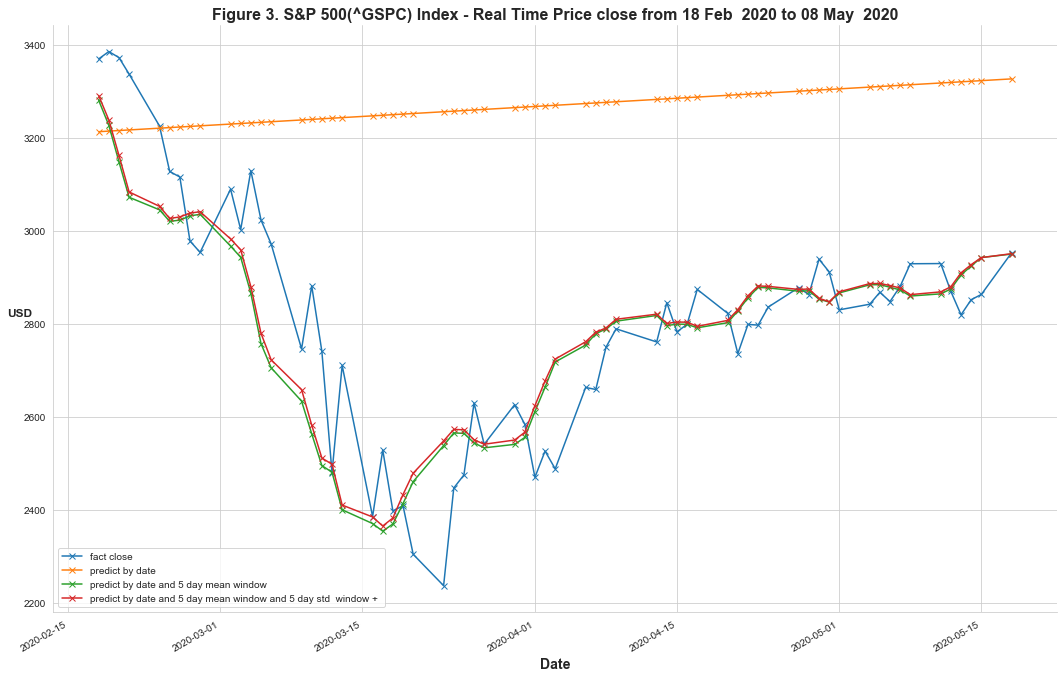

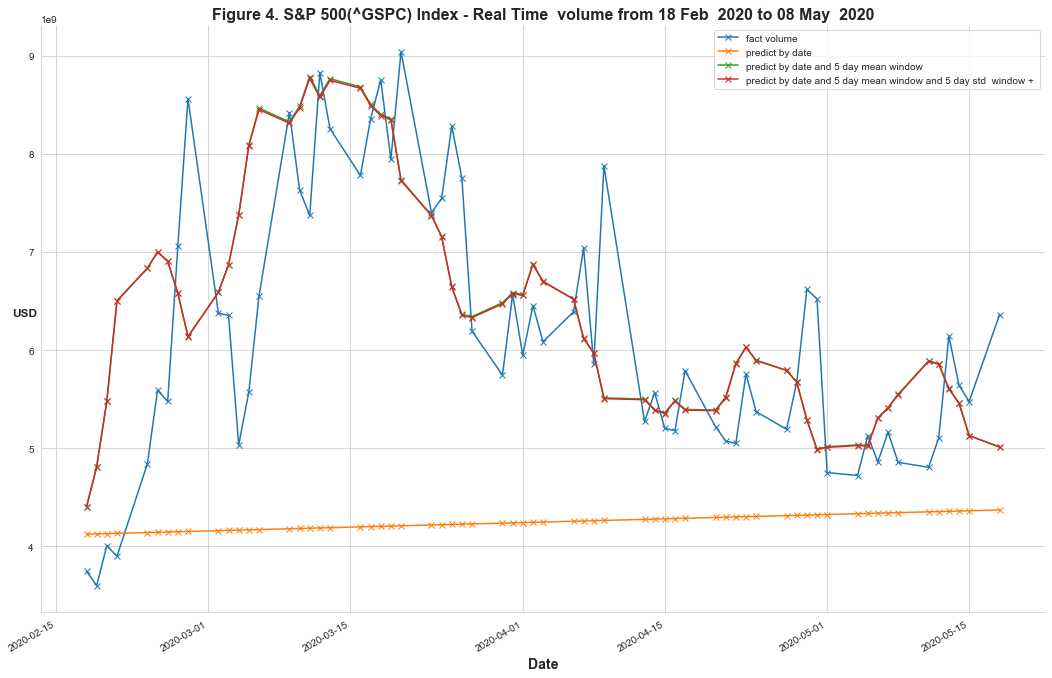

In [ ]:
# Define interval for plot
start_pl_dt = pd.Timestamp('2020-02-18')
end_pl_dt = pd.Timestamp('2020-05-18')
# Define dataframe for close
close_plt = close_predict_lasso[(close_predict_lasso["date"] >= start_pl_dt) & 
                      (close_predict_lasso["date"] <= end_pl_dt)]

# Define  datafrane for volume
volume_plt = volume_predict_lasso[(volume_predict_lasso["date"] >= start_pl_dt) & 
                      (volume_predict_lasso["date"] <= end_pl_dt)]

# Plot for close using default pandas plot
fig, ax = plt.subplots(figsize = (18, 12))
ax = close_plt.set_index("date").plot.line(ax = ax, marker='x')
handles, labels = ax.get_legend_handles_labels()
new_labels = ["fact close", "predict by date", "predict by date and 5 day mean window",
              "predict by date and 5 day mean window and 5 day std  window + "]
ax.legend(labels = new_labels)
ax.set_xlabel('Date', weight = "bold", fontsize = 14)
ax.set_ylabel('USD', weight = "bold", fontsize = 12, rotation=0)
ax.set_title("Figure 3. S&P 500(^GSPC) Index - Real Time Price close from 18 Feb  2020 \
to 08 May  2020", weight = "bold", fontsize = 16)
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)
plt.show()

# Plot for volume using default pandas plot
fig, ax = plt.subplots(figsize = (18, 12))
ax = volume_plt.set_index("date").plot.line(ax = ax, marker='x')
handles, labels = ax.get_legend_handles_labels()
new_labels = ["fact volume", "predict by date", "predict by date and 5 day mean window",
              "predict by date and 5 day mean window and 5 day std  window + "]
ax.legend(labels = new_labels)
ax.set_xlabel('Date', weight = "bold", fontsize = 14)
ax.set_ylabel('USD', weight = "bold", fontsize = 12, rotation=0)
ax.set_title("Figure 4. S&P 500(^GSPC) Index - Real Time  volume from 18 Feb  2020 \
to 08 May  2020", weight = "bold", fontsize = 16)
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)
plt.show()

## 10. Conclusion

* It would be possible to use k-nn or  linear regression to fill in all the missing data in the `snp500_c` and `snp500_v` - but taking into repaired feature of all remaining 8 features  the minimum error of 1.5 % for each added feature, and final model with at least have minimum 12% noise would be obtained, which would hardly increase the accuracy of such an artificially restored model.


* In the case of weak collinearity of the data, it does not matter which type of regression to use - standard Ordinal Least Square or Lasso.


* Both types of regression perfectly predict when the `Magic Money Tree`  is blooming - but in the conditions of a liquidity crisis, the accuracy of the prediction is not satisfactory. The accuracy of the prediction increases with the increase in the number of features.

Created on August 07, 2021

@author: Vadim Maklakov, used some ideas from public Internet resources.

© 3-clause BSD License

Software environment: Debian 10, Python 3.8.7

See required installed and imported python modules in the cell No 1.